# Clustering

Lino Galiana  
2025-12-26

<div class="badge-container"><div class="badge-text">If you want to try the examples in this tutorial:</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/en/modelisation/5_clustering.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«5_clustering»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«en/modelisation%205_clustering»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«5_clustering»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«en/modelisation%205_clustering»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//en/blob/main//notebooks/en/modelisation/5_clustering.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

Machine learning materials in this course uses a unique dataset, presented in the [introduction](index.qmd). All examples are based on US county level presidential election results combined with sociodemographic variables. Source code for data ingestion is available on [`Github`](https://github.com/linogaliana/python-datascientist/blob/main/content/modelisation/get_data.py).

In [ ]:
!pip install geopandas openpyxl plotnine plotly

In [ ]:
import pandas as pd

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/linogaliana/python-datascientist/main/content/modelisation/get_data.py'
r = requests.get(url, allow_redirects=True)
open('getdata.py', 'wb').write(r.content)

import getdata
votes = getdata.create_votes_dataframes()

It can also be useful to install `plotnine`
to easily create visualizations:

In [ ]:
!pip install plotnine

# 1. Introduction to *Clustering*

Until now, we have engaged in supervised learning because we knew the true value of the variable to be explained/predicted (`y`). This is no longer the case with unsupervised learning.

*Clustering* is a field of application within unsupervised learning.
It involves leveraging available information by grouping observations
that are similar based on their common characteristics (*features*).

<details>

<summary>

Reminder: The Decision Tree of `Scikit` Methods

</summary>

![](https://upload.wikimedia.org/wikipedia/commons/a/a4/Scikit-learn_machine_learning_decision_tree.png)

</details>

The objective is to create groups of observations (*clusters*) where:

-   Within each cluster, the observations are homogeneous (minimal intra-cluster variance);
-   Clusters have heterogeneous profiles, meaning they are distinct from one another (maximal inter-cluster variance).

In *Machine Learning*, clustering methods are widely used for
recommendation systems. For example, by creating homogeneous groups of
consumers, it becomes easier to identify and target behaviors specific to each consumer group.

These methods also have applications in economics and social sciences as they enable
grouping observations without prior assumptions, thereby interpreting a variable
of interest in light of these results. This [publication on spatial segregation using mobile phone data](https://www.insee.fr/fr/statistiques/4925200)
is an example of this approach.
In some databases, there may be a few labeled examples while most are
unlabeled. The labels might have been manually created by experts.

> **Note**
>
> <div class="callout callout-style-default callout-note callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Note
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> Clustering methods can also be used upstream of a classification problem (in
> semi-supervised learning problems).
> The book *Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow* (Géron 2022) provides
> examples in the chapter dedicated to unsupervised learning.
>
> For instance, suppose that in the [MNIST dataset of handwritten digits](https://en.wikipedia.org/wiki/MNIST_database), the digits are unlabeled,
> and we want to determine the best strategy for labeling this dataset.
> One could randomly look at handwritten digit images in the dataset and label them.
> However, the book’s authors demonstrate a better strategy.
> It is better to apply a clustering algorithm beforehand to group the images together and have a
> representative image per group, then label these representative images instead of labeling randomly.
>
> </div>
> </div>

There are numerous clustering methods.
We will focus on the most intuitive one: *k-means*.

# 2. k-means

## 2.1 Principle

The objective of *k-means* is to partition the observation space by finding points (*centroids*) that act as centers of gravity around which nearby observations can be grouped into homogeneous classes.
The *k-means* algorithm works iteratively, initializing the centroids and then updating them at each iteration until the centroids stabilize. Here are some examples of *clusters* resulting from the *k-means* method:

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_assumptions_001.png)

> **Tip**
>
> <div class="callout callout-style-default callout-tip callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Tip
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> The objective of *k-means* is to find a partition of the data $S=\{S_1,...,S_K\}$ such that
> $$
> \arg\min_{S} \sum_{i=1}^K \sum_{x \in S_i} ||x - \mu_i||^2
> $$
> where $\mu_i$ is the mean of $x_i$ in the set of points $S_i$.
>
> </div>
> </div>

In this chapter, we will primarily use `Scikit`. However, here is a suggested import of packages to save time.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
import seaborn as sns

Dans le prochain exercice, nous allons utiliser les variables suivantes:

In [ ]:
# 1. Chargement de la base restreinte.
xvars = [
  'Unemployment_rate_2019', 'Median_Household_Income_2021',
  'Percent of adults with less than a high school diploma, 2018-22',
  "Percent of adults with a bachelor's degree or higher, 2018-22"
]

votes = votes.dropna(subset = xvars + ["per_gop"])

df2 = votes.loc[:, xvars + ["per_gop"]]

> **Tip**
>
> <div class="callout callout-style-default callout-tip callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Exercise 1: Principle of k-means
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> 1.  Perform a *k-means* with $k=4$.
> 2.  Create a `label` variable in `votes` to store the typology results.
> 3.  Display this typology on a map.
> 4.  Choose the variables `Median_Household_Income_2021` and `Unemployment_rate_2019` and represent the scatter plot, coloring it differently based on the obtained label. What is the problem?
> 5.  Repeat questions 2 to 5, standardizing the variables beforehand.
> 6.  Represent the distribution of the vote for each *cluster*.
>
> </div>
> </div>

In [ ]:
# Question 1
model = KMeans(n_clusters=4)
model.fit(df2[xvars])

In [ ]:
# Question 3
votes['label'] = model.labels_

The map obtained in question 4, which allows us to
spatially represent our groups, is
as follows:

In [ ]:
# Question 4
p = votes.plot(column = "label", cmap = "inferno")
p.set_axis_off()

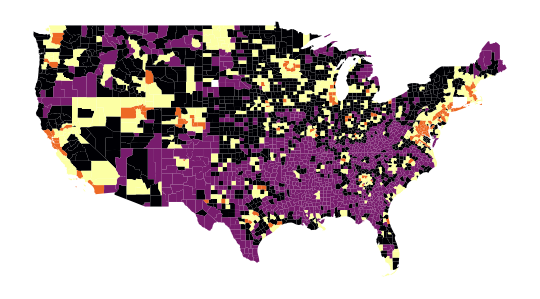

In [ ]:
p.get_figure()

The scatter plot from question 5, representing
the relationship between `Median_Household_Income_2021`
and `Unemployment_rate_2019`, will have the following appearance:

In [ ]:
from plotnine import *

# Question 5
votes['label'] = pd.Categorical(votes['label'])

p = (
    ggplot(votes) +
    geom_point(
        aes(
            x = "Median_Household_Income_2021",
            y = "Unemployment_rate_2019",
            color = "label"
            ),
         alpha = 0.4
    ) +
    theme_bw() + scale_x_log10()
)

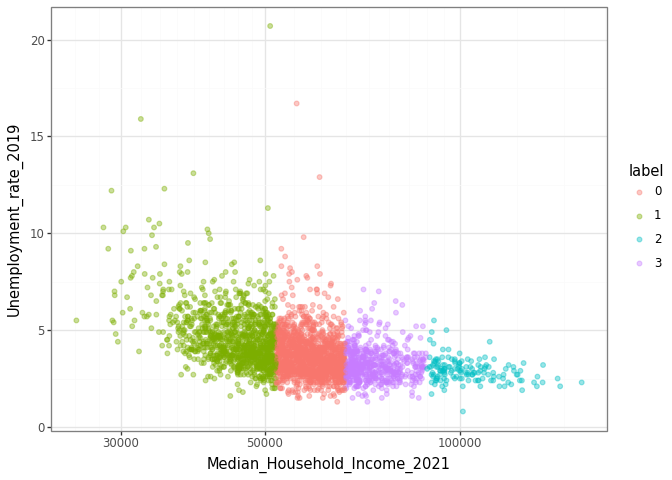

In [ ]:
p

The classification appears too distinct in this figure.
This suggests that the income variable (`Median_Household_Income_2021`)
explains the partitioning produced by our model too well to be normal.
This is likely due to the high variance of income compared to other variables.
In such situations, as mentioned earlier, it is recommended to standardize the variables.

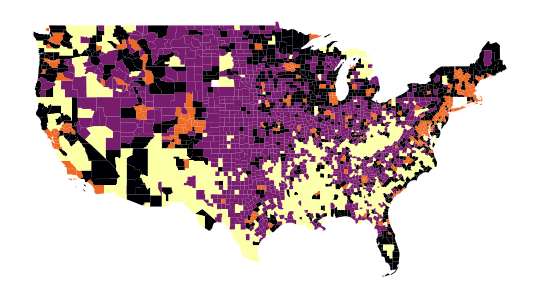

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

kmeans = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=4, random_state=123)
)
kmeans.fit(df2)

votes['label'] = kmeans.predict(df2)

p = votes.plot(column = "label", cmap = "inferno")
p.set_axis_off()

Thus, the following map is obtained in question 5:

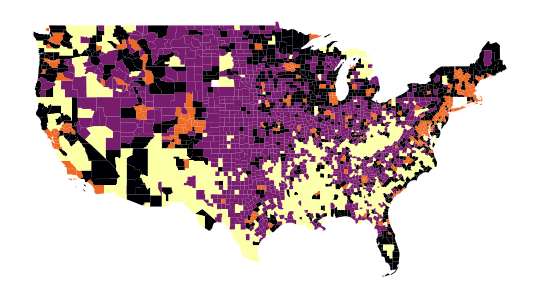

In [ ]:
p.get_figure()

And the scatter plot from question 5 has a less deterministic appearance, which is preferable:

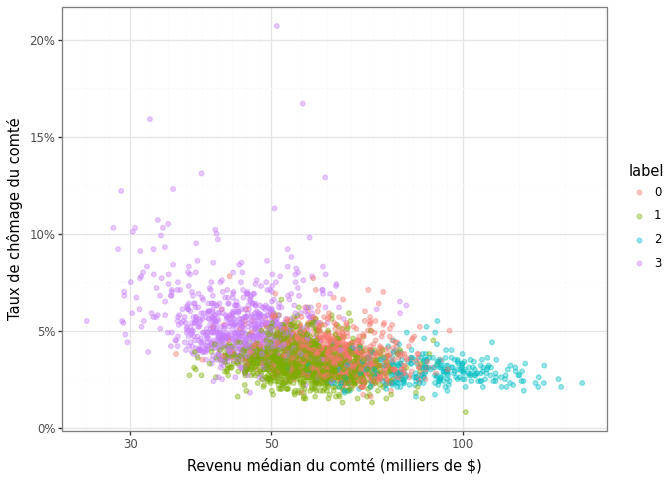

In [ ]:
from plotnine import *
from mizani.formatters import percent_format

votes['label'] = pd.Categorical(votes['label'])

(
    ggplot(votes) +
    geom_point(
        aes(
            x = "Median_Household_Income_2021/1000",
            y = "Unemployment_rate_2019/100",
            color = "label"
        ),
        alpha = 0.4
    ) +
    theme_bw() + scale_x_log10() +
    scale_y_continuous(labels=percent_format()) +
    labs(
      x = "Revenu médian du comté (milliers de $)",
      y = "Taux de chômage du comté")
)

Finally, regarding question 6, the following histogram of votes for each cluster is obtained:

In [ ]:
# Question 6
plt.figure()
p2 = (
  ggplot(votes) +
  geom_histogram(
      aes(x = "per_gop", fill = "label"), alpha = 0.2, position="identity"
      ) +
  theme_minimal()
)

> **Tip**
>
> <div class="callout callout-style-default callout-tip callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Tip
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> Several points about the algorithm implemented by default in `scikit-learn` should be noted, as outlined in
> the documentation:
>
> -   The default algorithm is *kmeans++* (see the `init` parameter). This means that
>     the initialization of centroids is done intelligently so that the initial centroids are chosen
>     to avoid being too close to each other.
> -   The algorithm will start with `n_init` different centroids, and the model will select the best initialization
>     based on the model’s *inertia*, with a default value of 10.
>
> The model outputs the `cluster_centers_`, the labels `labels_`, the inertia `inertia_`, and the number of iterations
> `n_iter_`.
>
> </div>
> </div>

## 2.2 Choosing the number of clusters

Up to now, we have taken the number of clusters as given, as if there were a legitimate reason to think that we need 4 rather than 7 voting profiles.

Like any (hyper)parameter in a machine learning approach, we may want to vary its value and, in the absence of a theory to decide, pick the least bad empirical choice.

There is a trade-off between bias and variance: too large a number of clusters implies very low within-cluster variance, which is typical of overfitting, even though it is never possible to determine the true type of an observation since we are in unsupervised learning.

Without prior knowledge of the number of clusters, we can rely on two families of methods:

-   **Elbow method**: We take the inflection point of the model performance curve. This corresponds to the moment when adding an additional cluster, which increases model complexity, brings only modest gains in modeling the data.

-   **Silhouette score**: We measure the similarity between a point and the other points in its cluster relative to other clusters, and choose the model that best separates clusters (see <a href="#tip-silhouette-en" class="quarto-xref">Tip 2.1</a>).  

> **Tip 2.1**
>
> <div class="callout callout-style-default callout-tip callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Tip
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> > Silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object iswell matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters
> >
> > Source: [Wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering))
>
> The silhouette score is therefore a measure of the trade-off between **cluster cohesion** (to what extent observations within a cluster are homogeneous) and **cluster separation** (to what extent clusters are distinct from one another).
>
> For each observation $i$, the silhouette of the point is:
>
> $$
> s(i) = \frac{b(i)-a(i)}{\max(a(i),b(i))}
> $$
>
> where $a(i)$ is the average distance between $i$ and the other points in its own cluster (a measure of cohesion) and $b(i)$ is the smallest average distance between $i$ and the points of another cluster (a measure of separation).
>
> The value (s(i)) lies between **-1** and **1**:
>
> -   **$s(i) \approx 1$** : $a(i) \ll b(i)$  
>     The point is well assigned to its cluster: it is close to the points in its cluster and far from the others.
>
> -   **$s(i) \approx 0$** : $a(i) \approx b(i)$  
>     The point lies on the boundary between two clusters: separation is weak locally.
>
> -   **$s(i) < 0$** : $a(i) > b(i)$
>     The point is probably misassigned: on average, it is closer to another cluster than to its own.
>
> The silhouette score is the average of the points’ silhouette values.
>
> </div>
> </div>

> **Tip**
>
> <div class="callout callout-style-default callout-tip callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Exercise: determine the optimal number of clusters using the elbow method
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> 1.  Evaluate inertia and distortion by varying the number of *clusters* (from 1 to 9).
> 2.  Plot the results and interpret them.
>
> </div>
> </div>

In [ ]:
xvars = [
  'Unemployment_rate_2019', 'Median_Household_Income_2021',
  'Percent of adults with less than a high school diploma, 2018-22',
  "Percent of adults with a bachelor's degree or higher, 2018-22"
]

df2 = votes.loc[:, xvars + ["per_gop"]].dropna()

In [ ]:
# Question 1
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df2.loc[:, xvars]

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    inertias.append(kmeanModel.inertia_)


performance_analysis = pd.DataFrame(
    {
        "K": range(1, 10),
        "distorsions": distortions,
        "inertias": inertias
    }
)

In [ ]:
def represent_performance(
  df_performance: pd.DataFrame, metric: str
):

  kmin = int(df_performance["K"].min())
  kmax = int(df_performance["K"].max())

  p = (
      ggplot(df_performance, aes(x="K", y=metric))
      + geom_line()
      + geom_point()
      + theme_minimal()
      + theme(
          axis_text_y=element_blank(),
          axis_ticks_major_y=element_blank(),
          axis_title_y=element_blank()
      )
      + scale_x_continuous(breaks=list(range(kmin, kmax + 1)))
  )

  return p

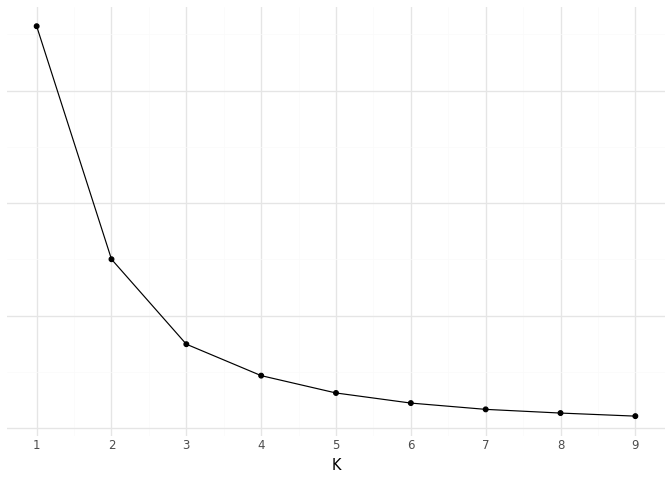

In [ ]:
represent_performance(performance_analysis, "inertias")

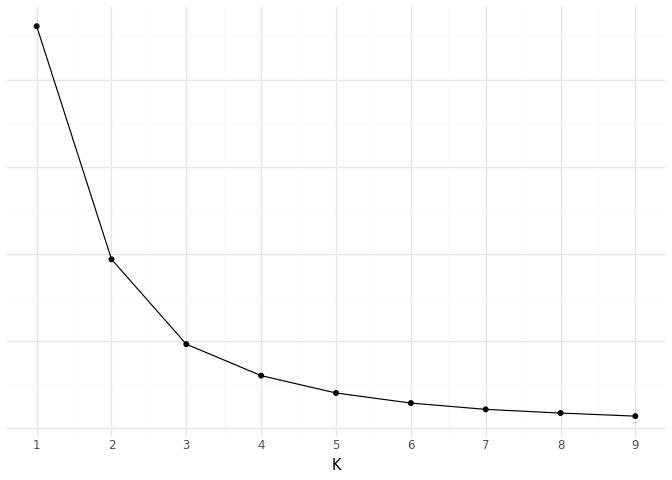

In [ ]:
represent_performance(performance_analysis, "distorsions")

## 2.3 Other Clustering Methods

There are many other clustering methods. Among the most well-known, here are three notable examples:

-   Hierarchical Agglomerative Clustering (HAC);
-   DBSCAN;
-   Gaussian Mixture Models.

### 2.3.1 Hierarchical Agglomerative Clustering (HAC)

What is the principle?

-   Start by calculating the dissimilarity between our *N* individuals, i.e., their pairwise distances in the variable space.
-   Then, group the two individuals whose grouping minimizes a given aggregation criterion, thus creating a class containing these two individuals.
-   Next, calculate the dissimilarity between this class and the *N-2* other individuals using the aggregation criterion.
-   Then, group the two individuals or classes of individuals whose grouping minimizes the aggregation criterion.
-   Continue until all individuals are grouped.

These successive groupings produce a binary classification tree (dendrogram), where the root corresponds to the class grouping all individuals. This dendrogram represents a hierarchy of partitions. A partition can be chosen by truncating the tree at a certain level, based on either user constraints or more objective criteria.

More information [here](https://www.xlstat.com/en/solutions/features/hierarchical-clustering-hac).

### 2.3.2 DBSCAN

The [DBSCAN algorithm](https://en.wikipedia.org/wiki/DBSCAN) is implemented in `sklearn.cluster`.
It can be used notably for anomaly detection.
This method is based on clustering in regions of continuous observation density using the concept of neighborhood within a certain epsilon distance.
For each observation, it is checked whether there are neighbors within its epsilon-distance neighborhood. If there are at
least `min_samples` neighbors, the observation will be a *core instance*.

Observations that are not *core instances* and have no *core instances* in their epsilon-distance neighborhood
will be detected as anomalies.

### 2.3.3 Gaussian Mixture Models

For theoretical insights, see the course [Probabilistic and Computational Statistics, M1 Jussieu, V.Lemaire and T.Rebafka](https://perso.lpsm.paris/~rebafka/#enseignement).
Refer especially to the notebooks for the EM algorithm for Gaussian mixture models.

In `sklearn`, Gaussian mixture models are implemented in `sklearn.mixture` as `GaussianMixture`.
Key parameters include the number of Gaussians `n_components` and the number of initializations `n_init`.
Gaussian mixture models can also be used for anomaly detection.

> **Note**
>
> <div class="callout callout-style-default callout-note callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Going Further
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> There are many other clustering methods:
>
> -   Local Outlier Factor;
> -   Bayesian Gaussian Mixture Models;
> -   Other Hierarchical Clustering Methods;
> -   Etc.
>
> </div>
> </div>

# 3. Principal Component Analysis (PCA)

## 3.1 For Cluster Visualization

The simplest method to visualize *clusters*, regardless of how they were obtained, would be to represent each individual in the *N*-dimensional space of the table’s variables, coloring each individual based on their cluster.
This would clearly differentiate the most discriminating variables and the various groups.
One issue here: as soon as *N \> 3*, it becomes difficult to represent the results intelligibly…

This is where **Principal Component Analysis** ([PCA](https://www.xlstat.com/en/solutions/features/principal-component-analysis-pca)) comes into play, allowing us to project our high-dimensional space into a smaller-dimensional space.
The major constraint of this projection is to retain the maximum amount of information (measured by the total variance of the dataset) within our reduced number of dimensions, called principal components.
By limiting to 2 or 3 dimensions, we can visually represent relationships between observations with minimal loss of reliability.

We can generally expect that clusters determined in our N-dimensional space will differentiate well in our PCA projection and that the composition of the principal components based on the initial variables will help interpret the obtained clusters.
Indeed, the linear combination of columns creating our new axes often has “meaning” in the real world:

-   Either because a small handful of variables represent the majority of the component;
-   Or because most columns contributing to the summed component combine well to form a natural interpretation.

To practice cluster creation methods, from raw data to PCA visualization, refer to part 2 of subject 3 in the 2023 funathon, *Explore the eating habits of our compatriots*, on [SSP Cloud](https://www.sspcloud.fr/formation?search=funath&path=%5B%22Funathon%202023%22%5D) or on [Github](https://github.com/InseeFrLab/funathon2023_sujet3/).

## 3.2 For Dimensionality Reduction

PCA is also very useful in reducing the number of variables for many types of modeling, such as linear regression.
It is possible to project the space of explanatory variables into a lower-dimensional space, specifically to limit the risks of *overfitting*.

The drawback of this approach is that it makes the data used as input for the model less interpretable compared to LASSO, as the latter selects variables, while PCA selects linear combinations of our variables.

## 3.3 Example

Let us revisit our previous data. Before performing a principal component analysis, whose objective is to synthesize sources of variability in our data, it is advisable to standardize the variables when they have different scales (which is the case here).

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df2.drop(['per_gop'], axis=1)
y = votes['winner']

print('Dimensions des données avant PCA : {}'.format(X.shape))

Dimensions des données avant PCA : (3099, 4)

Let us start with a preliminary test by reducing our data to two components, that is, two linear combinations of the data. This is a very practical method implemented in `Scikit`. Doing it manually would be cumbersome.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

n_components = 2
pca = PCA(n_components=n_components)

Géron, Aurélien. 2022. *Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow*. " O’Reilly Media, Inc.".